<a href="https://colab.research.google.com/github/tranbaquang1708/GraduationThesis/blob/develop/IGR_2d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
import os
mp = os.path.abspath(os.path.join('/content/drive/My Drive/GraduationThesis/gitrepo/GraduationThesis/'))
sys.path.append(mp)

In [2]:
import torch
from modules import IGR, Visualization, Operation

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
# Off surface points
filename = mp + '/dataset/2d/superior.vert'
dataset, normal_vectors = Operation.read_txt2(filename, device)

In [5]:
traineddata_path = mp + '/models/superior_noconstrain.traineddata'
model = IGR.load_model(traineddata_path, device)

In [6]:
loss_function = IGR.LossFunction()
model = IGR.train(dataset, normal_vectors, 30000, 200, device, loss_function, model=model)

Step 500:
tensor(1.0006, device='cuda:0', grad_fn=<AddBackward0>)
Step 1000:
tensor(1.0018, device='cuda:0', grad_fn=<AddBackward0>)
Step 1500:
tensor(1.0003, device='cuda:0', grad_fn=<AddBackward0>)
Step 2000:
tensor(1.0022, device='cuda:0', grad_fn=<AddBackward0>)
Step 2500:
tensor(0.9970, device='cuda:0', grad_fn=<AddBackward0>)
Step 3000:
tensor(0.9686, device='cuda:0', grad_fn=<AddBackward0>)
Step 3500:
tensor(0.8551, device='cuda:0', grad_fn=<AddBackward0>)
Step 4000:
tensor(0.8664, device='cuda:0', grad_fn=<AddBackward0>)
Step 4500:
tensor(0.8295, device='cuda:0', grad_fn=<AddBackward0>)
Step 5000:
tensor(0.8270, device='cuda:0', grad_fn=<AddBackward0>)
Step 5500:
tensor(0.7868, device='cuda:0', grad_fn=<AddBackward0>)
Step 6000:
tensor(0.7643, device='cuda:0', grad_fn=<AddBackward0>)
Step 6500:
tensor(0.7247, device='cuda:0', grad_fn=<AddBackward0>)
Step 7000:
tensor(0.7273, device='cuda:0', grad_fn=<AddBackward0>)
Step 7500:
tensor(0.7851, device='cuda:0', grad_fn=<AddBackward

In [7]:
IGR.save_model(traineddata_path, model)

In [9]:
xx, yy = Visualization.grid_from_torch(dataset[:,0], dataset[:,1], device)

In [11]:
z = Visualization.nn_sampling(model, xx, yy)

tensor([[ 2.1918e-02, -3.2712e-03, -2.8090e-02,  ..., -4.4280e-02,
         -2.2099e-02,  5.8218e-03],
        [ 4.7317e-02,  2.3187e-02, -1.0163e-03,  ..., -2.6757e-02,
         -4.8018e-03,  2.3972e-02],
        [ 6.8731e-02,  4.6982e-02,  2.4353e-02,  ..., -1.3390e-02,
          9.2960e-03,  3.9841e-02],
        ...,
        [-5.2502e-02, -2.9950e-02, -9.4680e-03,  ..., -2.2288e+00,
         -2.2838e+00, -2.3323e+00],
        [ 8.0307e-03,  2.7406e-02,  4.1523e-02,  ..., -2.3416e+00,
         -2.4013e+00, -2.4542e+00],
        [ 6.6043e-02,  7.5397e-02,  7.4869e-02,  ..., -2.4313e+00,
         -2.5039e+00, -2.5645e+00]], device='cuda:0', grad_fn=<ViewBackward>)


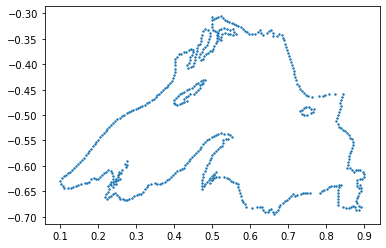

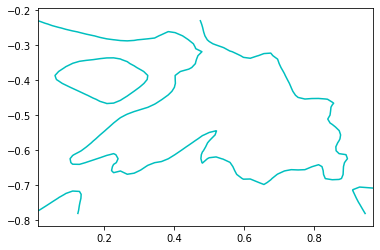

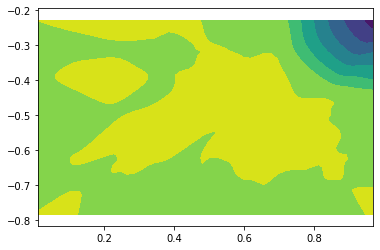

In [12]:
Visualization.visualize2(dataset.detach().cpu().numpy(), normal_vectors.detach().cpu().numpy(), xx.detach().cpu().numpy(), yy.detach().cpu().numpy(), z.detach().cpu().numpy(), scatter=True, vecfield=False, surface=True, offsurface=False, filled_contour=True)